# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Loading the Dataset

In [ ]:
dataset_path = '/content/drive/My Drive/telecom_churn'

In [ ]:
train_csv_path = os.path.join(dataset_path, 'train.csv')
train_df = pd.read_csv(train_csv_path)

test_csv_path = os.path.join(dataset_path, 'test.csv')
test_df = pd.read_csv(test_csv_path)

data_dict_csv_path = os.path.join(dataset_path, 'data_dictionary.csv')
data_dict_df = pd.read_csv(data_dict_csv_path)

# Understanding the Data

In [ ]:
# print("Train dataset:")
# print(train_df.head())

# print("\nTest dataset:")
# print(test_df.head())

print("\nData Dictionary:")
print(data_dict_df)


Data Dictionary:
       Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within th

In [ ]:
data = train_df.set_index("id")
pd.set_option('display.max_columns', None)
print(data.head())

    circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                              
0         109             0.0             0.0             0.0   
1         109             0.0             0.0             0.0   
2         109             0.0             0.0             0.0   
3         109             0.0             0.0             0.0   
4         109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                           
0             6/30/2014            7/31/2014            8/31/2014   31.277   
1             6/30/2014            7/31/2014            8/31/2014    0.000   
2             6/30/2014            7/31/2014            8/31/2014   60.806   
3             6/30/2014            7/31/2014            8/31/2014  156.362   
4             6/30/2014            7/31/2014            8/31/2014  240.708  

In [ ]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    arpu_6                    float64
 8    arpu_7                    float64
 9    arpu_8                    float64
 10   onnet_mou_6               float64
 11   onnet_mou_7               float64
 12   onnet_mou_8               float64
 13   offnet_mou_6              float64
 14   offnet_mou_7              float64
 15   offnet_mou_8              float64
 16   roam_ic_mou_6             float64
 17   roam_ic_mou_7             float64
 18   roam_ic_mou_8             float64
 19   roam_og_mou_6             float64
 20   roam_og_m

In [ ]:
data.shape

(69999, 171)

# Data Cleaning and Preparation

In [ ]:
# Drop the null values rows in the column 'date_of_last_rech_6/768'
data = data[~pd.isnull(data["date_of_last_rech_7"])]
data = data[~pd.isnull(data["date_of_last_rech_6"])]
data = data[~pd.isnull(data["date_of_last_rech_8"])]

In [ ]:
missing_percentage = round(100 * (data.isnull().sum() / len(data)), 2)

missing_info = pd.DataFrame({'Column': data.columns,
                             'Missing Percentage': missing_percentage})


print(missing_info)

                                    Column  Missing Percentage
circle_id                        circle_id                0.00
loc_og_t2o_mou              loc_og_t2o_mou                0.52
std_og_t2o_mou              std_og_t2o_mou                0.52
loc_ic_t2o_mou              loc_ic_t2o_mou                0.52
last_date_of_month_6  last_date_of_month_6                0.00
...                                    ...                 ...
aon                                    aon                0.00
aug_vbc_3g                      aug_vbc_3g                0.00
jul_vbc_3g                      jul_vbc_3g                0.00
jun_vbc_3g                      jun_vbc_3g                0.00
churn_probability        churn_probability                0.00

[171 rows x 2 columns]


In [ ]:
data.describe(include="all")

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,65945.0,65605.0,65605.0,65605.0,65945,65945,65945,65945.000000,65945.000000,65945.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.0,64469.0,63758.0,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,65945.000000,65945.000000,65945.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.0,64469.0,63758.0,64103.000000,64469.000000,63758.000000,65945.000000,65945.000000,65945.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,64103.000000,64469.000000,63758.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945,65945,65945,65945.000000,65945.000000,65945.000000,17

In [ ]:
data_before = data
missing_percentage = 100 * (data.isnull().sum() / len(data))

threshold = 50

columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

data.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
print(len(columns_to_drop))
print(columns_to_drop)

30
['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [ ]:
#checking the number of rows and columns after removing null values
data.shape

(65945, 141)

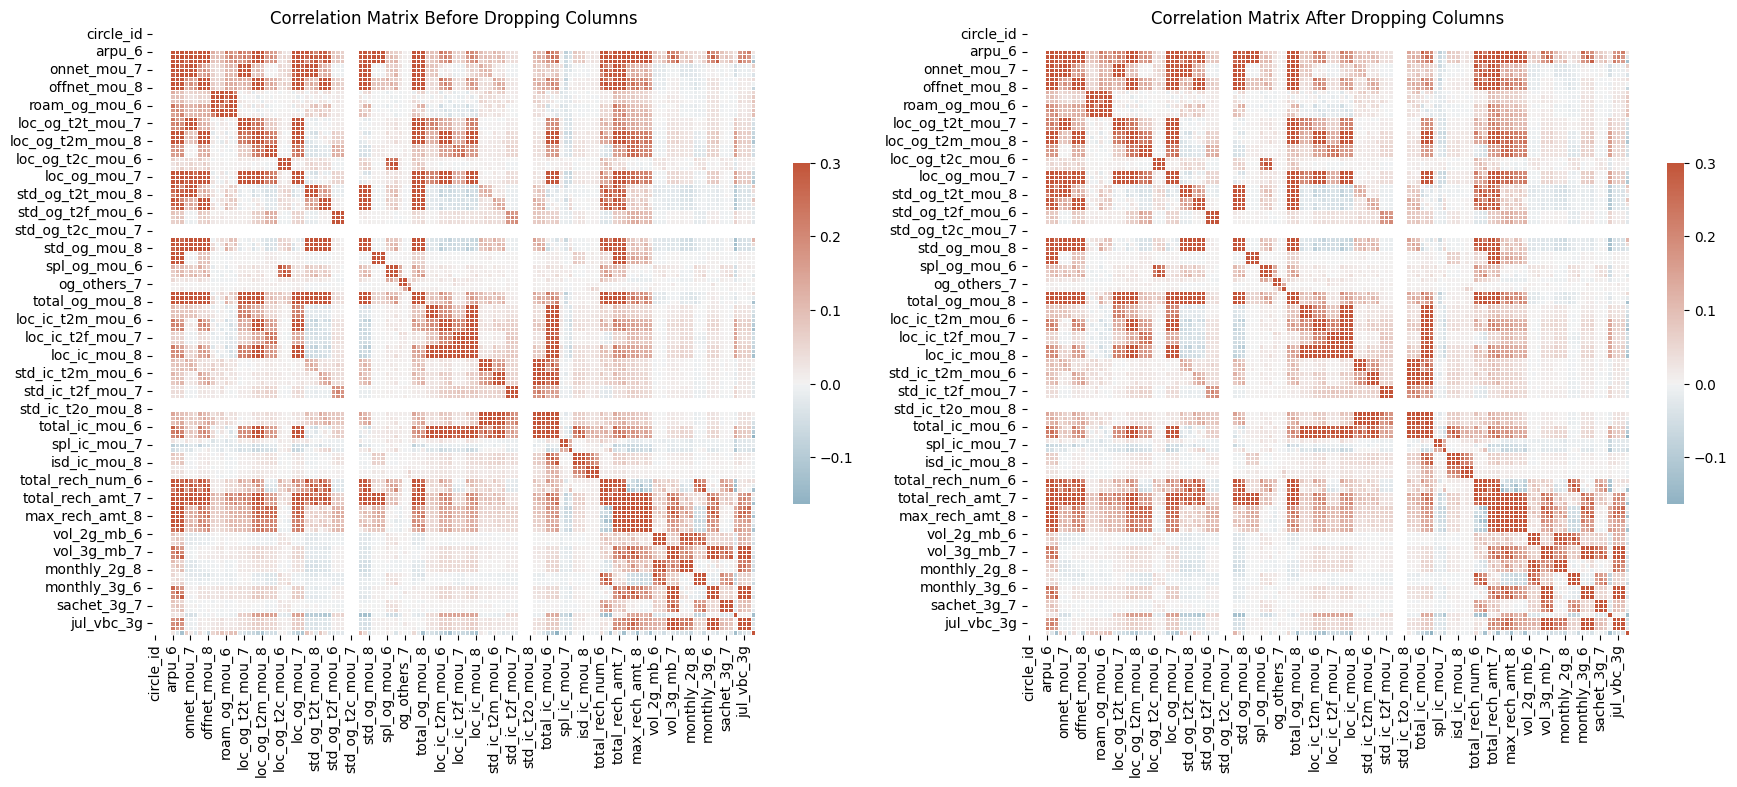

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


datetime_columns = data.select_dtypes(include=['datetime64']).columns.tolist()

non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

columns_to_exclude = datetime_columns + non_numeric_columns

filtered_data_before = data_before.drop(columns=columns_to_exclude)
correlation_before = filtered_data_before.corr()

filtered_data_after = data.drop(columns=columns_to_exclude)
correlation_after = filtered_data_after.corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation_before, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
ax[0].set_title('Correlation Matrix Before Dropping Columns')

sns.heatmap(correlation_after, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
ax[1].set_title('Correlation Matrix After Dropping Columns')

plt.tight_layout()
plt.show()

In [ ]:
missing_counts = data.isnull().sum()

missing_info = pd.DataFrame({'Column': data.columns,
                             'Missing Count': missing_counts})

pd.set_option('display.max_columns', None)

print(missing_info)

                                    Column  Missing Count
circle_id                        circle_id              0
loc_og_t2o_mou              loc_og_t2o_mou            340
std_og_t2o_mou              std_og_t2o_mou            340
loc_ic_t2o_mou              loc_ic_t2o_mou            340
last_date_of_month_6  last_date_of_month_6              0
...                                    ...            ...
aon                                    aon              0
aug_vbc_3g                      aug_vbc_3g              0
jul_vbc_3g                      jul_vbc_3g              0
jun_vbc_3g                      jun_vbc_3g              0
churn_probability        churn_probability              0

[141 rows x 2 columns]


In [ ]:
data_before = data
missing_counts = data.isnull().sum()

threshold = 3000

columns_to_drop = missing_counts[missing_counts >= threshold].index.tolist()

data.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
print(len(columns_to_drop))
print(columns_to_drop)

0
[]


In [ ]:
data.shape

(65945, 141)

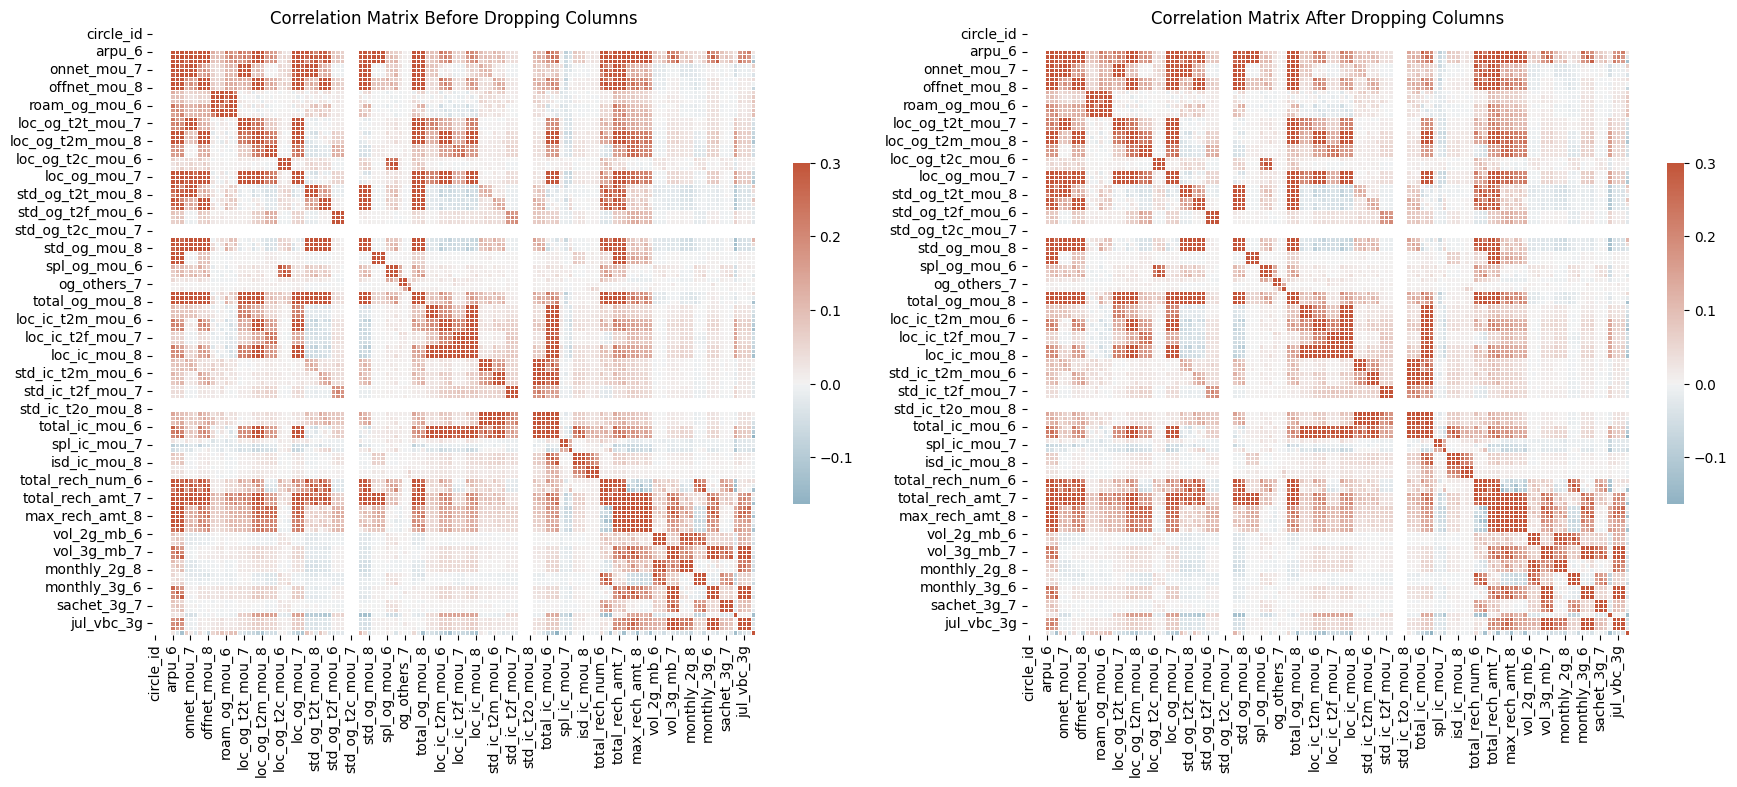

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


datetime_columns = data.select_dtypes(include=['datetime64']).columns.tolist()

non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

columns_to_exclude = datetime_columns + non_numeric_columns

filtered_data_before = data_before.drop(columns=columns_to_exclude)
correlation_before = filtered_data_before.corr()

filtered_data_after = data.drop(columns=columns_to_exclude)
correlation_after = filtered_data_after.corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation_before, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
ax[0].set_title('Correlation Matrix Before Dropping Columns')

sns.heatmap(correlation_after, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
ax[1].set_title('Correlation Matrix After Dropping Columns')

plt.tight_layout()
plt.show()

In [ ]:
# Checking if there are columns with one unique value since it won't affect our analysis
data.nunique(dropna=True)

circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
                        ...  
aon                      3449
aug_vbc_3g              10447
jul_vbc_3g              10016
jun_vbc_3g               9291
churn_probability           2
Length: 141, dtype: int64

In [ ]:
# Dropping unique valued columns
data= data.drop(["circle_id","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou",
                  "last_date_of_month_6","last_date_of_month_7","last_date_of_month_8",
                  "std_og_t2c_mou_6","std_og_t2c_mou_7","std_ic_t2o_mou_6","std_ic_t2o_mou_7",],axis=1)

In [ ]:
data.shape

(65945, 130)

In [ ]:
round(100*(data.isnull().sum()/len(data.index)), 2)

arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
onnet_mou_6          2.79
onnet_mou_7          2.24
                     ... 
aon                  0.00
aug_vbc_3g           0.00
jul_vbc_3g           0.00
jun_vbc_3g           0.00
churn_probability    0.00
Length: 130, dtype: float64

In [ ]:
for column in data.columns:
    column_value_counts = data[column].value_counts()
    print(f"Column: {column}")
    print(column_value_counts)
    print()

Column: arpu_6
arpu_6
 0.000      1999
-5.000        61
 20.000       41
 1.000        40
 3.000        33
            ... 
 179.191       1
 99.516        1
 137.948       1
 143.942       1
 168.269       1
Name: count, Length: 58986, dtype: int64

Column: arpu_7
arpu_7
 0.000      1564
-5.000        53
 20.000       33
 1.000        26
 1.500        26
            ... 
 389.830       1
 137.770       1
 453.239       1
 151.830       1
 42.815        1
Name: count, Length: 59304, dtype: int64

Column: arpu_8
arpu_8
 0.000      2347
-5.000        91
 1.000        33
 0.010        32
 0.100        30
            ... 
 119.791       1
 528.389       1
 567.371       1
 196.644       1
 167.961       1
Name: count, Length: 58455, dtype: int64

Column: onnet_mou_6
onnet_mou_6
0.00      5825
0.33        58
0.26        51
0.31        49
1.01        46
          ... 
283.46       1
454.76       1
496.94       1
183.19       1
116.54       1
Name: count, Length: 19660, dtype: int64

Column: 

In [ ]:
# checking the null values again
data.isnull().sum().head(100).sort_values(ascending = False)

isd_og_mou_8        2187
spl_og_mou_8        2187
loc_og_mou_8        2187
loc_ic_t2m_mou_8    2187
og_others_8         2187
                    ... 
total_og_mou_7         0
total_og_mou_6         0
arpu_7                 0
arpu_8                 0
max_rech_amt_7         0
Length: 100, dtype: int64

In [ ]:
# checking the shape again
data.shape

(65945, 130)

In [ ]:
# Checking the information of each columns again
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65945 entries, 0 to 69998
Columns: 130 entries, arpu_6 to churn_probability
dtypes: float64(101), int64(26), object(3)
memory usage: 65.9+ MB


In [ ]:
# Convert date columns to date format
data["date_of_last_rech_6"]= pd.to_datetime(data["date_of_last_rech_6"],format = "%m/%d/%Y")
data["date_of_last_rech_7"]= pd.to_datetime(data["date_of_last_rech_7"],format = "%m/%d/%Y")
data["date_of_last_rech_8"]= pd.to_datetime(data["date_of_last_rech_8"],format = "%m/%d/%Y")

In [ ]:
data.shape

(65945, 130)

In [ ]:
null_counts = data.isnull().sum()

# Display all columns along with their null counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # Show all rows and columns
    print(null_counts)

arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            1842
onnet_mou_7            1476
onnet_mou_8            2187
offnet_mou_6           1842
offnet_mou_7           1476
offnet_mou_8           2187
roam_ic_mou_6          1842
roam_ic_mou_7          1476
roam_ic_mou_8          2187
roam_og_mou_6          1842
roam_og_mou_7          1476
roam_og_mou_8          2187
loc_og_t2t_mou_6       1842
loc_og_t2t_mou_7       1476
loc_og_t2t_mou_8       2187
loc_og_t2m_mou_6       1842
loc_og_t2m_mou_7       1476
loc_og_t2m_mou_8       2187
loc_og_t2f_mou_6       1842
loc_og_t2f_mou_7       1476
loc_og_t2f_mou_8       2187
loc_og_t2c_mou_6       1842
loc_og_t2c_mou_7       1476
loc_og_t2c_mou_8       2187
loc_og_mou_6           1842
loc_og_mou_7           1476
loc_og_mou_8           2187
std_og_t2t_mou_6       1842
std_og_t2t_mou_7       1476
std_og_t2t_mou_8       2187
std_og_t2m_mou_6       1842
std_og_t2m_mou_7       1476
std_og_t2m_mou_8    

#EDA Analysis

The overall churn rate is 8.26%.


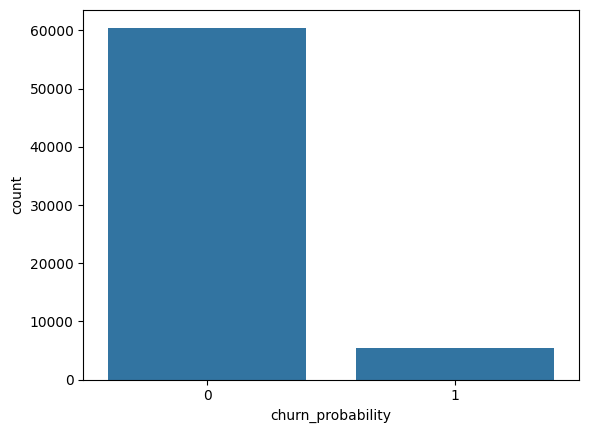

In [ ]:
sns.countplot(x="churn_probability",data = data)
churn_rate = data['churn_probability'].mean() * 100
print(f"The overall churn rate is {churn_rate:.2f}%.")

<ipython-input-33-e913e9ad754a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['aon'], ax=ax1)


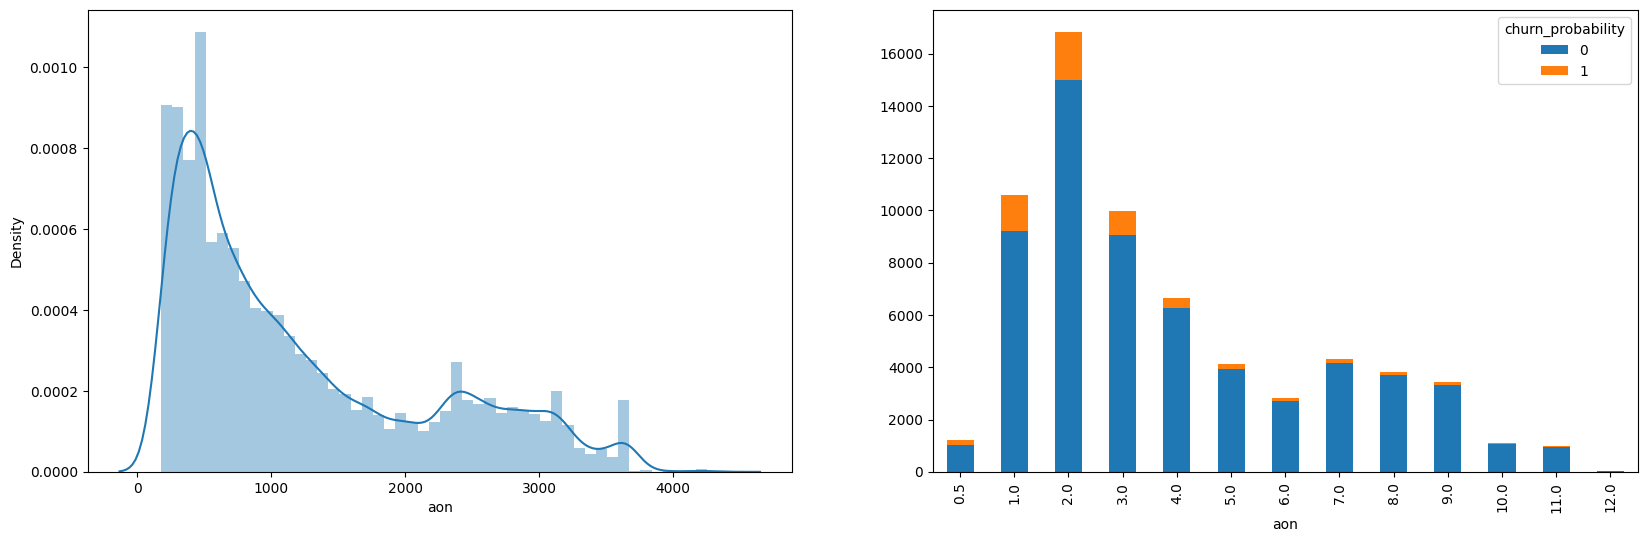

In [ ]:
#Average time on network
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

sns.distplot(data['aon'], ax=ax1)

bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pd.crosstab(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), data['churn_probability']).plot(kind='bar', stacked=True, ax = ax2)
plt.show()

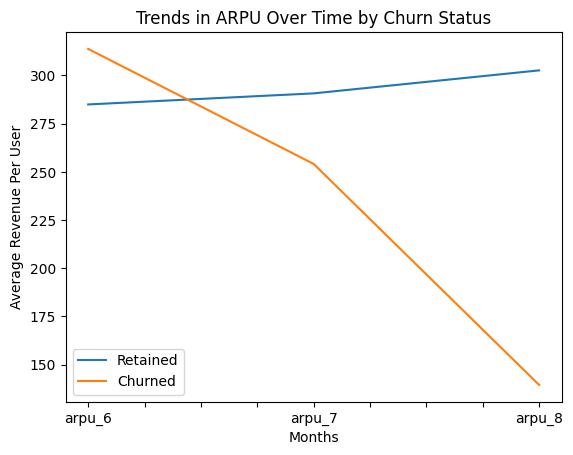

In [ ]:
# Time series analysis of ARPU
data.groupby('churn_probability')[['arpu_6', 'arpu_7', 'arpu_8']].mean().T.plot()
plt.title('Trends in ARPU Over Time by Churn Status')
plt.xlabel('Months')
plt.ylabel('Average Revenue Per User')
plt.legend(['Retained', 'Churned'])
plt.show()

count    65945.000000
mean       287.297126
std        332.321661
min       -810.661000
25%         95.329000
50%        201.673000
75%        376.804000
max      27731.088000
Name: arpu_6, dtype: float64

count    65945.000000
mean       287.635352
std        347.882184
min       -622.509000
25%         94.529000
50%        200.707000
75%        375.538000
max      35145.834000
Name: arpu_7, dtype: float64

count    65945.000000
mean       289.113693
std        356.136185
min       -345.129000
25%         93.127000
50%        202.185000
75%        381.206000
max      33543.624000
Name: arpu_8, dtype: float64

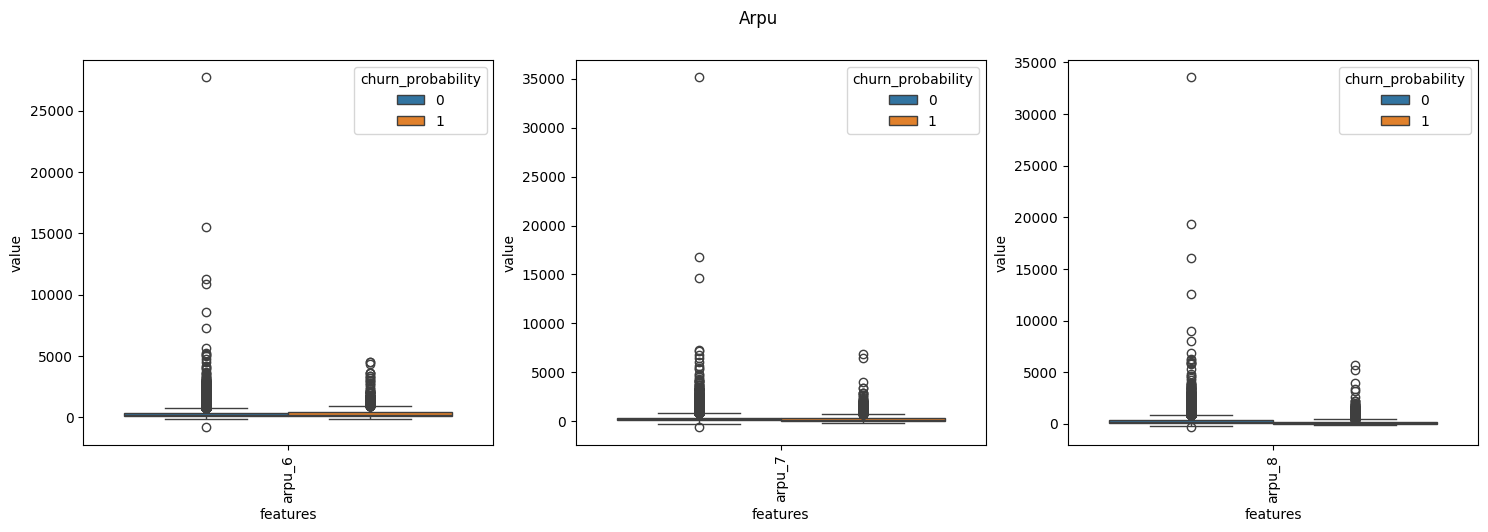

In [ ]:
cols = ['arpu_6','arpu_7','arpu_8']

# column description stats
for i in range(0,3):
    display(data[cols[i]].describe())

# plot for the arpu
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)
    plt.suptitle('Arpu')

,total_og_mou_6
count,65945.000000
mean,312.659935
std,468.616515
min,0.000000
25%,47.810000
50%,149.530000
75%,383.540000
max,10674.030000


,total_og_mou_7
count,65945.000000
mean,321.711233
std,484.639874
min,0.000000
25%,49.110000
50%,150.740000
75%,397.090000
max,8285.640000


,total_og_mou_8
count,65945.000000
mean,315.425999
std,481.928555
min,0.000000
25%,45.780000
50%,148.080000
75%,386.980000
max,14043.060000


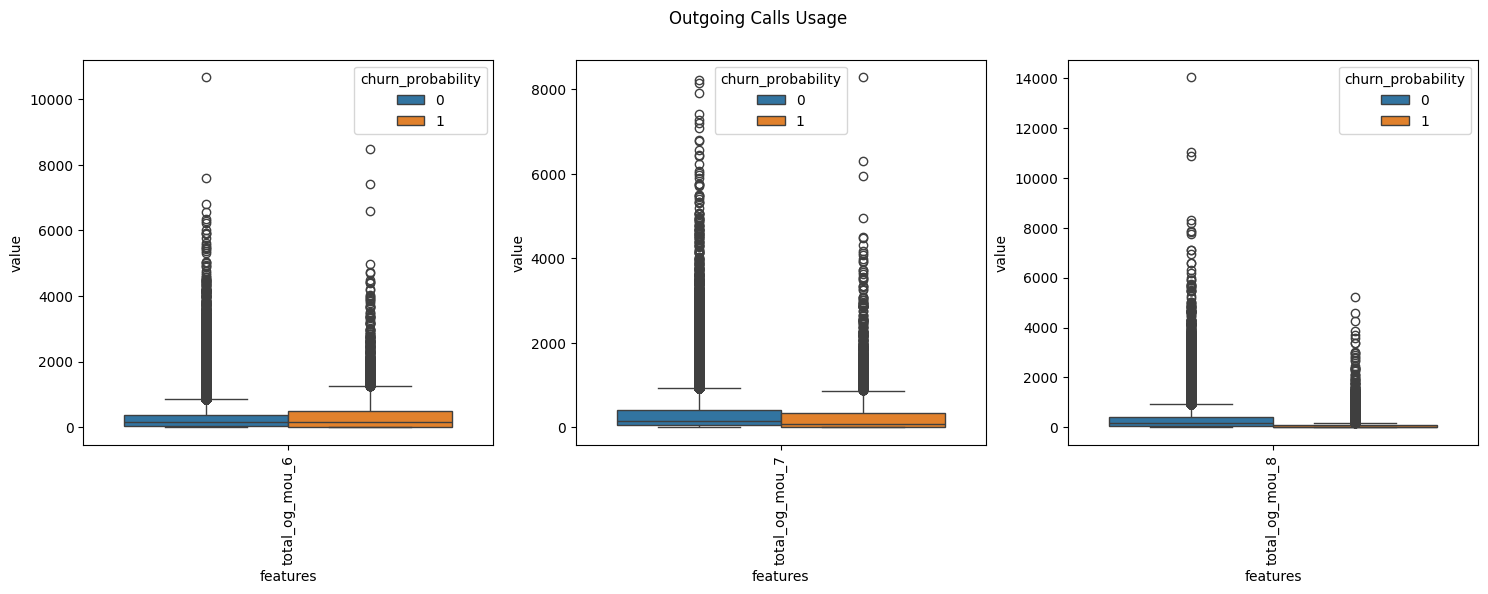

In [ ]:
#Outgoing
cols = [['total_og_mou_6'],
        ['total_og_mou_7'],
        ['total_og_mou_8']]
for i in range(0,3):
    display(data[cols[i]].describe())

plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)
    plt.suptitle('Outgoing Calls Usage')

count    65945.000000
mean       333.889499
std        401.474014
min          0.000000
25%        110.000000
50%        234.000000
75%        444.000000
max      35190.000000
Name: total_rech_amt_6, dtype: float64

count    65945.000000
mean       333.762620
std        416.008477
min          0.000000
25%        110.000000
50%        230.000000
75%        440.000000
max      40335.000000
Name: total_rech_amt_7, dtype: float64

count    65945.000000
mean       337.499932
std        431.034407
min          0.000000
25%        110.000000
50%        240.000000
75%        450.000000
max      45320.000000
Name: total_rech_amt_8, dtype: float64

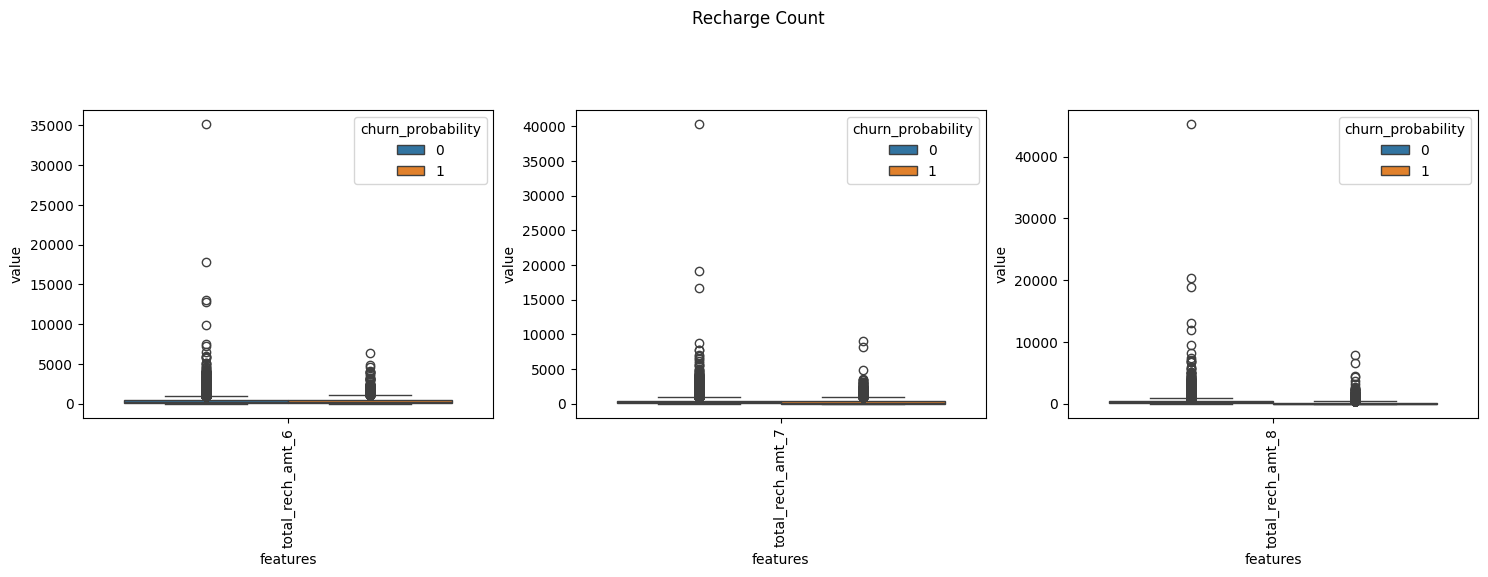

In [ ]:
#Total Recharge
cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
# column description stats
for i in range(0,3):
    display(data[cols[i]].describe())

# plot for the recharge count columns
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(0,3):
    plt.subplot(2,3,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)
    plt.suptitle('Recharge Count')

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
count,65945.000000,65945.000000,65945.000000
mean,53.272911,53.634959,52.466220
std,215.672803,216.178433,217.570843
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,10285.900000,7873.550000,11117.610000


,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,65945.000000,65945.000000,65945.000000
mean,126.271991,134.895435,142.620144
std,566.677293,567.469378,583.122351
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,45735.400000,28144.120000,30036.060000


,monthly_2g_6,monthly_2g_7,monthly_2g_8
count,65945.000000,65945.000000,65945.000000
mean,0.081234,0.087270,0.084843
std,0.298095,0.311356,0.305642
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000


,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,65945.000000,65945.000000,65945.000000
mean,0.077959,0.080795,0.085981
std,0.364643,0.391580,0.391289
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,9.000000,16.000000,16.000000


,sachet_2g_6,sachet_2g_7,sachet_2g_8
count,65945.000000,65945.000000,65945.000000
mean,0.402623,0.463037,0.472727
std,1.522542,1.692015,1.671987
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,42.000000,48.000000,44.000000


,sachet_3g_6,sachet_3g_7,sachet_3g_8
count,65945.000000,65945.000000,65945.000000
mean,0.077610,0.084859,0.089908
std,0.583561,0.650744,0.699343
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,29.000000,33.000000,41.000000


,jun_vbc_3g,jul_vbc_3g,aug_vbc_3g
count,65945.000000,65945.000000,65945.000000
mean,61.794209,68.717913,71.438013
std,261.376549,273.928108,274.513268
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,11166.210000,9165.600000,12916.220000


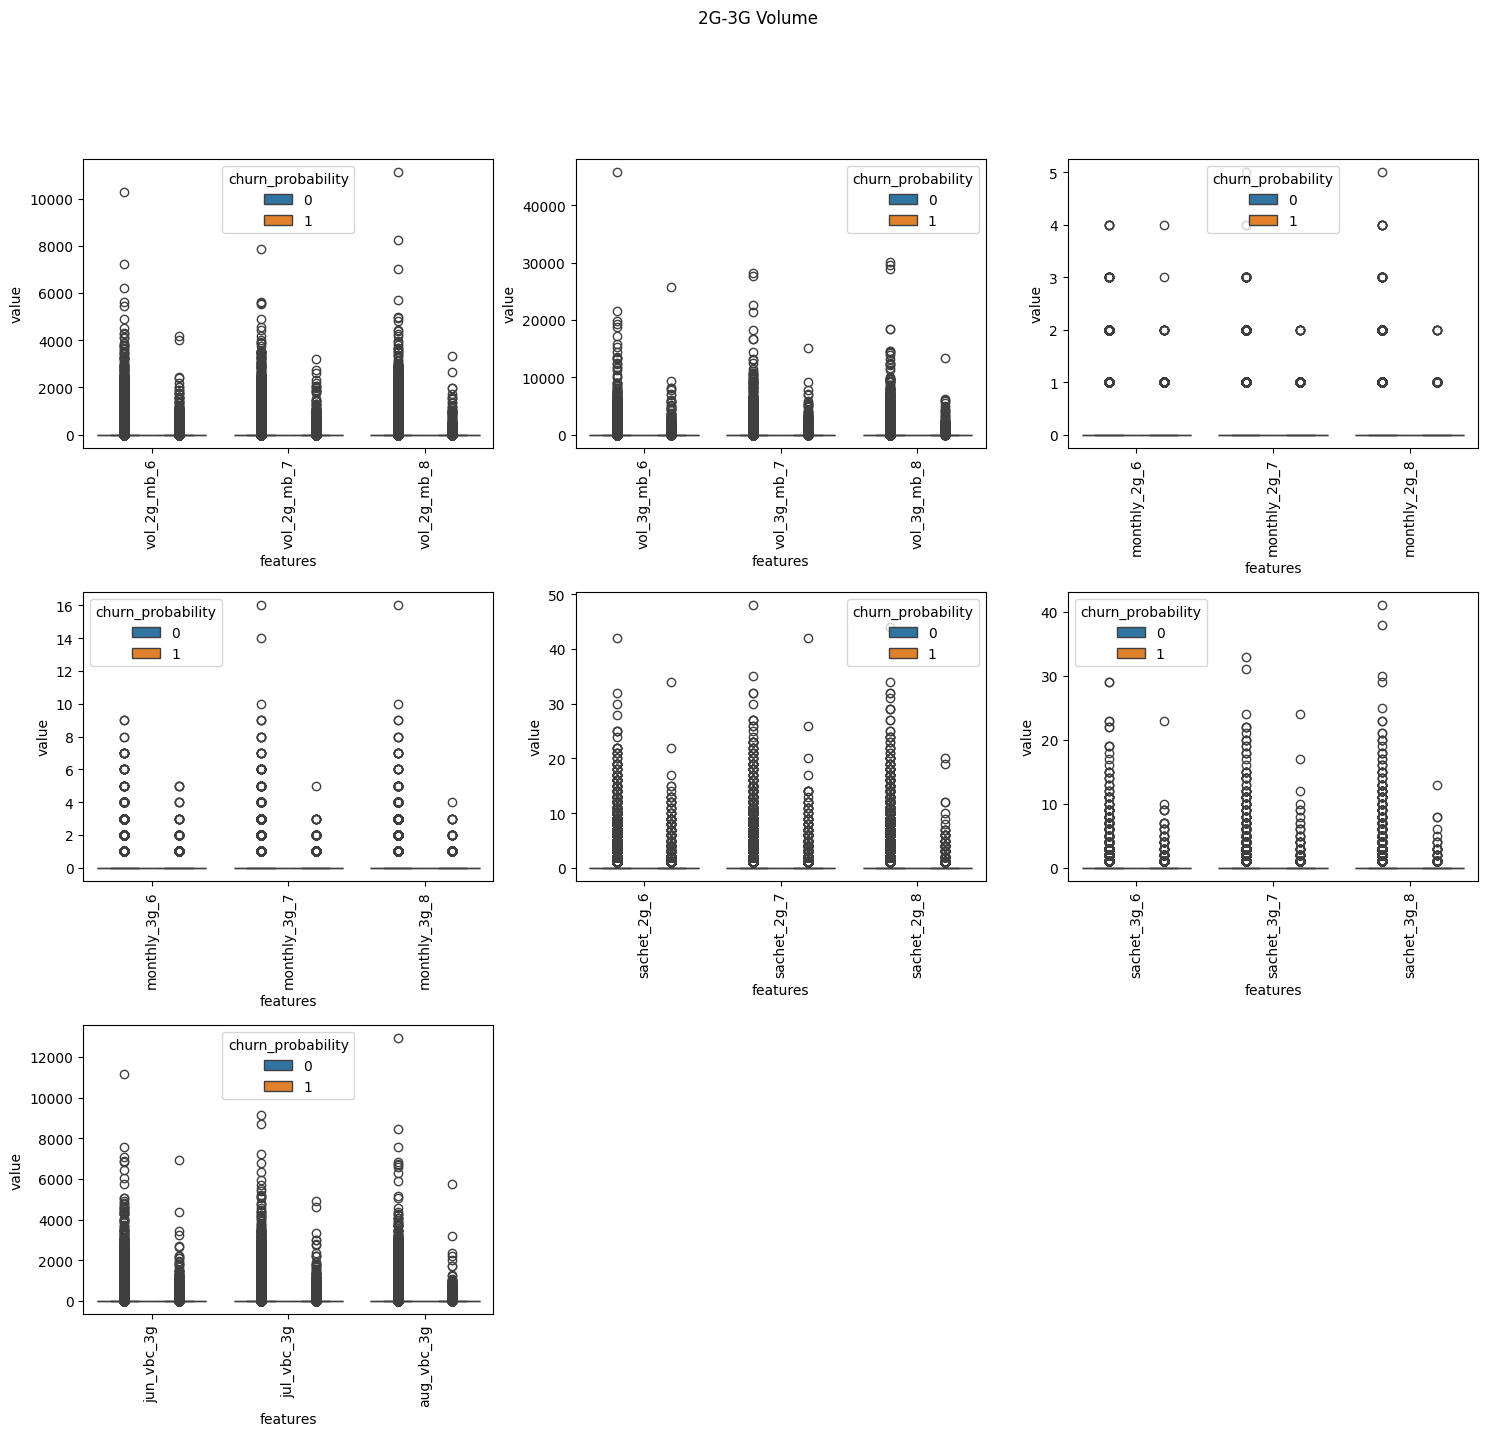

In [ ]:
#2g and 3g
cols = [
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']
       ]

# column description stats
for i in range(0,7):
    display(data[cols[i]].describe())

# plot for the 2g-3g volume
plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5)
for i in range(0,7):
    plt.subplot(3,3,i+1)
    X = pd.concat([data[cols[i]], data['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)
    plt.suptitle('2G-3G Volume')

In [ ]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns.tolist()

data = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

# Outlier Treatment

In [ ]:
for col in data.columns:
    if data[col].dtype == bool:
        data[col] = data[col].astype(int)
    else:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    lower_percentile = data[col].quantile(0.01)
    upper_percentile = data[col].quantile(0.99)

    data[col] = data[col].clip(lower=lower_percentile, upper=upper_percentile)

# Split into Train Test

In [ ]:
#Replacing null values with column mean
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
# Apply forward fill (ffill) to selected numeric columns
data_filled = data.copy()  # Make a copy of the original DataFrame to preserve it
data_filled[numeric_columns] = data_filled[numeric_columns].ffill()

# Check null counts after forward fill
null_counts = data_filled.isnull().sum()

# Display all columns along with their null counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null_counts)

arpu_6                                     0
arpu_7                                     0
arpu_8                                     0
onnet_mou_6                                0
onnet_mou_7                                0
onnet_mou_8                                0
offnet_mou_6                               0
offnet_mou_7                               0
offnet_mou_8                               0
roam_ic_mou_6                              0
roam_ic_mou_7                              0
roam_ic_mou_8                              0
roam_og_mou_6                              0
roam_og_mou_7                              0
roam_og_mou_8                              0
loc_og_t2t_mou_6                           0
loc_og_t2t_mou_7                           0
loc_og_t2t_mou_8                           0
loc_og_t2m_mou_6                           0
loc_og_t2m_mou_7                           0
loc_og_t2m_mou_8                           0
loc_og_t2f_mou_6                           0
loc_og_t2f

In [ ]:
data_filled.to_csv('data_filled.csv', index=False)

In [ ]:
#Replacing null values with column Forward fill
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
data_for_filled = data.copy()
data_for_filled[numeric_columns] = data_for_filled[numeric_columns].ffill()

null_counts = data_for_filled.isnull().sum()

# Display all columns along with their null counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null_counts)

arpu_6                                     0
arpu_7                                     0
arpu_8                                     0
onnet_mou_6                                0
onnet_mou_7                                0
onnet_mou_8                                0
offnet_mou_6                               0
offnet_mou_7                               0
offnet_mou_8                               0
roam_ic_mou_6                              0
roam_ic_mou_7                              0
roam_ic_mou_8                              0
roam_og_mou_6                              0
roam_og_mou_7                              0
roam_og_mou_8                              0
loc_og_t2t_mou_6                           0
loc_og_t2t_mou_7                           0
loc_og_t2t_mou_8                           0
loc_og_t2m_mou_6                           0
loc_og_t2m_mou_7                           0
loc_og_t2m_mou_8                           0
loc_og_t2f_mou_6                           0
loc_og_t2f

In [ ]:
#Replacing null values with column Interpolation
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
data_inter_filled = data.copy()
data_inter_filled[numeric_columns] = data_inter_filled[numeric_columns].interpolate(method='linear')

null_counts = data_inter_filled.isnull().sum()

# Display all columns along with their null counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null_counts)

arpu_6                                     0
arpu_7                                     0
arpu_8                                     0
onnet_mou_6                                0
onnet_mou_7                                0
onnet_mou_8                                0
offnet_mou_6                               0
offnet_mou_7                               0
offnet_mou_8                               0
roam_ic_mou_6                              0
roam_ic_mou_7                              0
roam_ic_mou_8                              0
roam_og_mou_6                              0
roam_og_mou_7                              0
roam_og_mou_8                              0
loc_og_t2t_mou_6                           0
loc_og_t2t_mou_7                           0
loc_og_t2t_mou_8                           0
loc_og_t2m_mou_6                           0
loc_og_t2m_mou_7                           0
loc_og_t2m_mou_8                           0
loc_og_t2f_mou_6                           0
loc_og_t2f

In [ ]:
numeric_cols = data_filled.select_dtypes(include=['number']).columns.tolist()
X_mean = data_filled[numeric_cols]
scaler = StandardScaler()
X_mean = scaler.fit_transform(X_mean)
X_mean = pd.DataFrame(X_mean, columns=numeric_cols)

In [ ]:
Y_mean = X_mean['churn_probability']
X_mean = X_mean.drop('churn_probability', axis=1)

In [ ]:
X_train_mean, X_test_mean, Y_train_mean, Y_test_mean = train_test_split(X_mean,Y_mean, test_size=0.3, random_state=42)
print(X_train_mean.shape, Y_train_mean.shape)
print(X_test_mean.shape, Y_test_mean.shape)

(46161, 215) (46161,)
(19784, 215) (19784,)


In [ ]:
from sklearn.decomposition import PCA
# Assuming X_train_mean is your training data
pca = PCA()  # Create a PCA object
pca.fit(X_train_mean)  # Fit PCA on your training data
pca_mean = pca.explained_variance_ratio_  # Get explained variance ratios

In [ ]:
numeric_cols = data_for_filled.select_dtypes(include=['number']).columns.tolist()
X_for = data_for_filled[numeric_cols]
scaler = StandardScaler()
X_for = scaler.fit_transform(X_for)
X_for = pd.DataFrame(X_for, columns=numeric_cols)

In [ ]:
Y_for = X_for['churn_probability']
X_for = X_for.drop('churn_probability', axis=1)

In [ ]:
X_train_forward_fill, X_test_forward_fill, Y_train_forward_fill, Y_test_forward_fill = train_test_split(X_for,Y_for, test_size=0.3, random_state=42)
print(X_train_forward_fill.shape, Y_train_forward_fill.shape)
print(X_test_forward_fill.shape, Y_test_forward_fill.shape)

(46161, 215) (46161,)
(19784, 215) (19784,)


In [ ]:
pca.fit(X_train_forward_fill)
pca_forward = pca.explained_variance_ratio_

In [ ]:
# Y_inter_filled = data_inter_filled['churn_probability']
# X_inter_filled = data_inter_filled.drop('churn_probability', axis=1)
# X_train_inter_filled, X_test_inter_filled, Y_train_inter_filled, Y_test_inter_filled = train_test_split(X_inter_filled,Y_inter_filled, test_size=0.3, random_state=42)
# print(X_train_inter_filled.shape, Y_train_inter_filled.shape)
# print(X_test_inter_filled.shape, Y_test_inter_filled.shape)

In [ ]:
# numeric_cols = data_inter_filled.select_dtypes(include=['number']).columns.tolist()
# X_train_numeric = data_inter_filled[numeric_cols]
# scaler = StandardScaler()
# X_train_scaled_numeric = scaler.fit_transform(X_train_numeric)
# X_train_inter_filled = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols)

In [ ]:
# pca.fit(X_train_forward_fill)
# pca_inter_filled = pca.explained_variance_ratio_

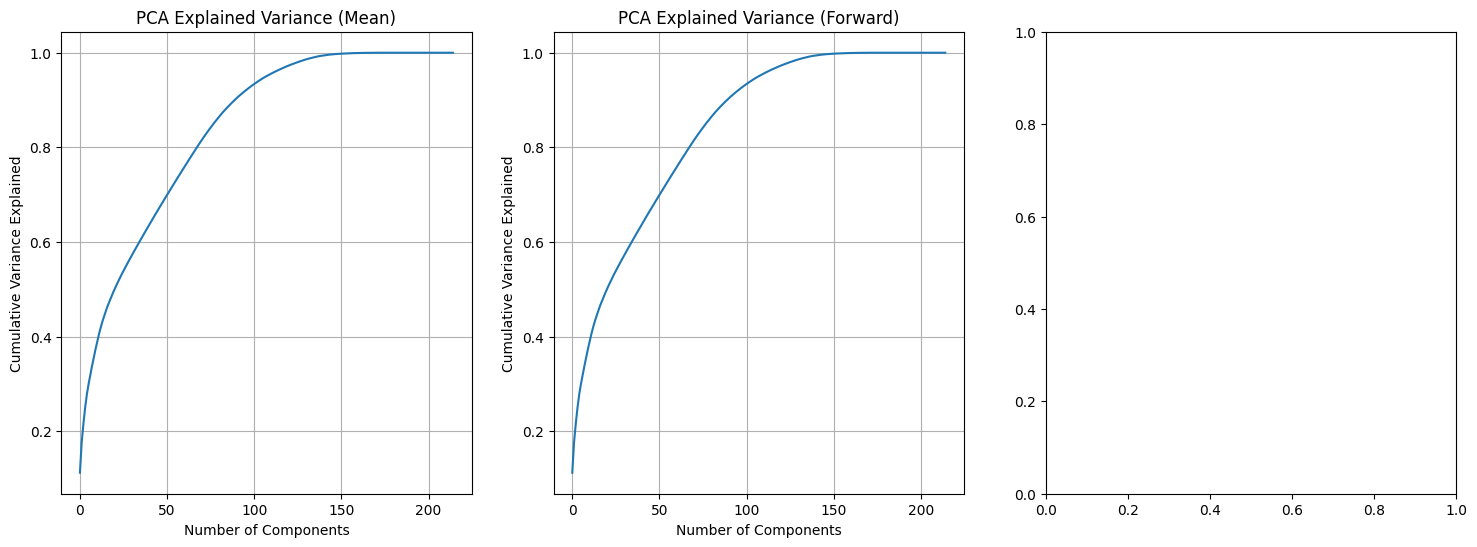

In [ ]:
# Assuming you have three sets of PCA explained variance ratios: pca_mean, pca_forward, pca_inter_filled
# Each set is assumed to be a list or array of explained variance ratios

# Create subplots to display the three plots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot pca_mean
axs[0].plot(np.cumsum(pca_mean))
axs[0].set_title('PCA Explained Variance (Mean)')
axs[0].set_xlabel('Number of Components')
axs[0].set_ylabel('Cumulative Variance Explained')
axs[0].grid(True)

# Plot pca_forward
axs[1].plot(np.cumsum(pca_forward))
axs[1].set_title('PCA Explained Variance (Forward)')
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Cumulative Variance Explained')
axs[1].grid(True)

# # Plot pca_inter_filled
# axs[2].plot(np.cumsum(pca_inter_filled))
# axs[2].set_title('PCA Explained Variance (Inter Filled)')
# axs[2].set_xlabel('Number of Components')
# axs[2].set_ylabel('Cumulative Variance Explained')
# axs[2].grid(True)

# # Adjust layout and display the plots
# plt.tight_layout()
# plt.show()

In [ ]:
pca_final_mean = IncrementalPCA(n_components=30)
df_train_pca_mean = pca_final_mean.fit_transform(X_train_mean)
df_train_pca_mean.shape

(46161, 30)

In [ ]:
pca_final_forward_fill = IncrementalPCA(n_components=30)
df_train_pca_forward_fill = pca_final_forward_fill.fit_transform(X_train_forward_fill)
df_train_pca_forward_fill.shape

# np.save('df_train_pca_mean.npy', df_train_pca_mean)

In [ ]:
# df_train_pca_mean = np.load('df_train_pca_mean.npy')

# # Convert the numpy array to a DataFrame
# df_train_pca_mean_df = pd.DataFrame(df_train_pca_mean)

# # Save the DataFrame as a CSV file
# df_train_pca_mean_df.to_csv('df_train_pca_mean.csv', index=False)

In [ ]:
# pca_final_inter_filled = IncrementalPCA(n_components=30)
# df_train_pca_inter_filled = pca_final_inter_filled.fit_transform(X_train_inter_filled)
# df_train_pca_inter_filled.shape

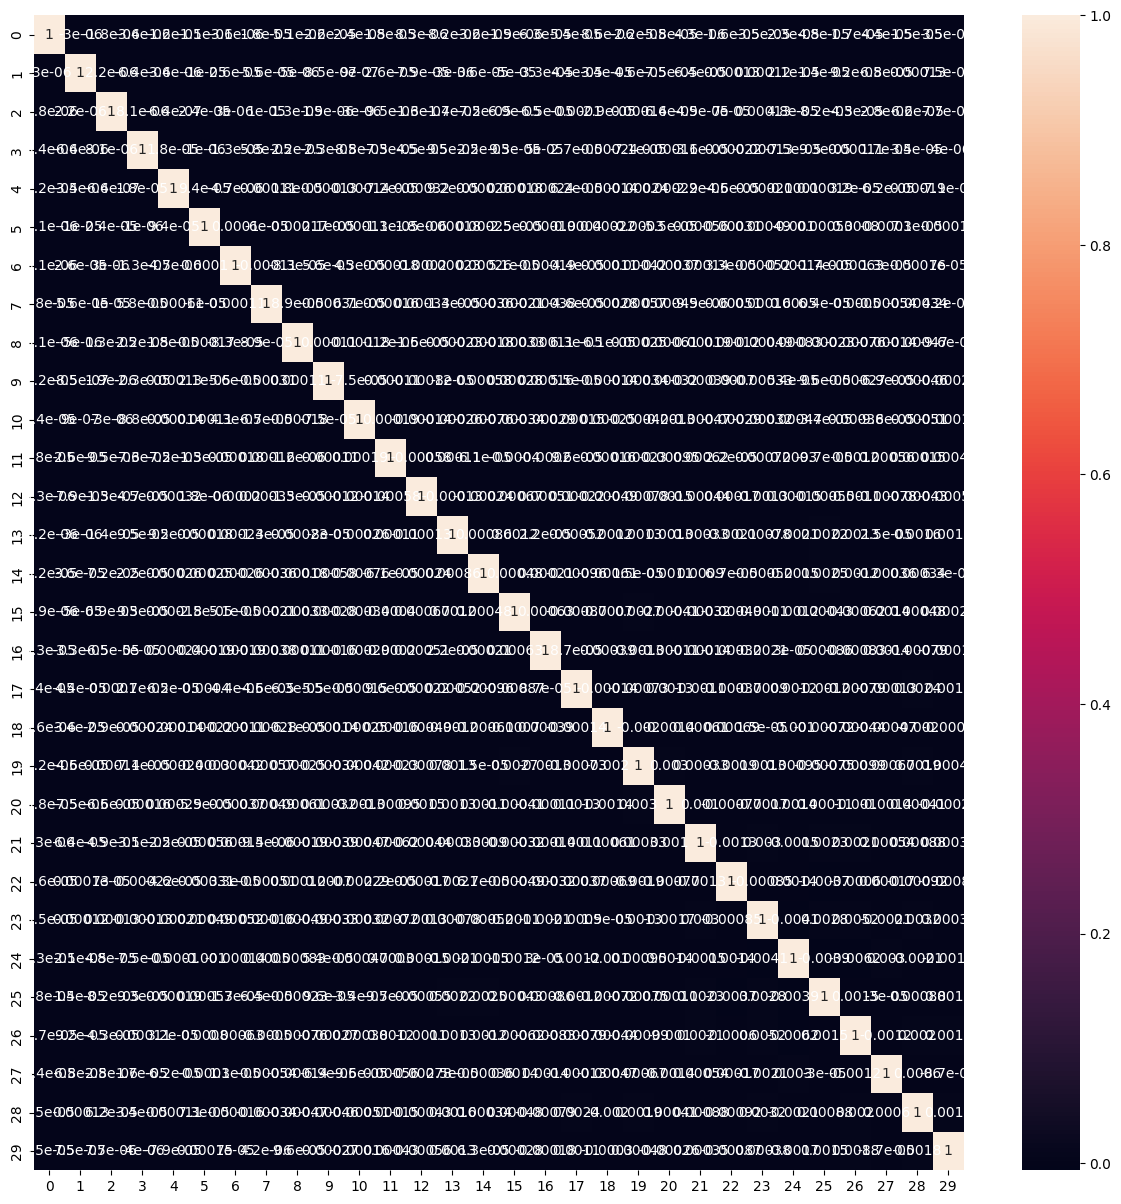

In [ ]:
#correlation matrix
corrmat = np.corrcoef(df_train_pca_mean.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)
plt.show()

# Model Building and Evaluation

In [ ]:
df_test_pca_mean = pca_final_mean.transform(X_test_mean)
df_test_pca_mean.shape

(19784, 30)

In [ ]:
df_test_pca_forward_fill = pca_final_forward_fill.transform(X_test_forward_fill)
df_test_pca_forward_fill.shape

(19784, 30)

In [ ]:
# df_test_pca_inter_filled = pca_final_inter_filled.transform(X_test_mean)
# df_test_pca_inter_filled.shape

In [ ]:
# fit and transform the whole dataset
X_mean_pca = pca.fit_transform(X_mean)
X_for_pca = pca.fit_transform(X_for)

In [ ]:
# List to store the model scores
model_score_list = []
# Will create a function and call it again and again for different models
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [ ]:
# Convert probability to binary class labels
threshold = 0.5  # Example threshold for churn probability
Y_train_binary = (Y_train_mean >= threshold).astype(int)
Y_test_binary = (Y_test_mean >= threshold).astype(int)

In [ ]:
# Initialize the Logistic regression
model1 = LogisticRegression(class_weight='balanced', random_state=42)
# fit the pca training data
model1.fit(df_train_pca_mean, Y_train_binary)
# predict the testing pca data
Y_pred = model1.predict(df_test_pca_mean)
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test_binary, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'LogisticRegression_Mean', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  74.48
ROC AUC score :  74.91
Precision score :  21.06
Recall score :  75.41


In [ ]:
# Convert probability to binary class labels
threshold = 0.5  # Example threshold for churn probability
Y_train_binary = (Y_train_forward_fill >= threshold).astype(int)
Y_test_binary = (Y_test_forward_fill >= threshold).astype(int)

In [ ]:
# Initialize the Logistic regression
model2 = LogisticRegression(class_weight='balanced', random_state=42)
# fit the pca training data
model2.fit(df_train_pca_forward_fill, Y_train_binary)
# predict the testing pca data
Y_pred = model2.predict(df_test_pca_forward_fill)
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test_binary, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'LogisticRegression_Forward Fill', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  74.48
ROC AUC score :  74.91
Precision score :  21.06
Recall score :  75.41


In [ ]:
# Convert probability to binary class labels
threshold = 0.5  # Example threshold for churn probability
Y_train_binary = (Y_train_mean >= threshold).astype(int)
Y_test_binary = (Y_test_mean >= threshold).astype(int)

In [ ]:
# initialize the randomforest
model3 = RandomForestClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
model3.fit(df_train_pca_mean, Y_train_binary)
# predict the pca testing data
Y_pred = model3.predict(df_test_pca_mean)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test_binary, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier_Mean', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  91.93
ROC AUC score :  54.31
Precision score :  58.98
Recall score :  9.19


In [ ]:
# Convert probability to binary class labels
threshold = 0.5  # Example threshold for churn probability
Y_train_binary = (Y_train_forward_fill >= threshold).astype(int)
Y_test_binary = (Y_test_forward_fill >= threshold).astype(int)

In [ ]:
# initialize the randomforest
model4 = RandomForestClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
model4.fit(df_train_pca_forward_fill, Y_train_binary)
# predict the pca testing data
Y_pred = model4.predict(df_test_pca_forward_fill)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test_binary, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier_Froward Fill', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  91.93
ROC AUC score :  54.31
Precision score :  58.98
Recall score :  9.19


In [ ]:
# Convert probability to binary class labels
threshold = 0.5  # Example threshold for churn probability
Y_train_binary = (Y_train_mean >= threshold).astype(int)
Y_test_binary = (Y_test_mean >= threshold).astype(int)

In [ ]:
# Initialize SVM classifier
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Fit SVM model on PCA-transformed training data
svm_model.fit(df_train_pca_mean, Y_train_binary)

# Predict using SVM model on PCA-transformed test data
Y_pred_svm = svm_model.predict(df_test_pca_mean)

In [ ]:
# Evaluate SVM model
svm_acc_score = accuracy_score(Y_test_binary, Y_pred_svm) * 100
svm_roc_score = roc_auc_score(Y_test_binary, Y_pred_svm) *100
svm_prec_score = precision_score(Y_test_binary, Y_pred_svm) *100
svm_rec_score = recall_score(Y_test_binary, Y_pred_svm) *100
# Add SVM model scores to model_score_list
model_score_list.append({
    'model_name': 'SVM_Mean',
    'acc_score': svm_acc_score,
    'roc_score': svm_roc_score,
    'precision_score': svm_prec_score,
    'recall_score': svm_rec_score
})
print(f"Accuracy Score :  {svm_acc_score}\nROC AUC score :  {svm_roc_score}\nPrecision score :  {svm_prec_score}\nRecall score :  {svm_rec_score}")

Accuracy Score :  83.20865345733927
ROC AUC score :  78.44511964051932
Precision score :  29.368395183091668
Recall score :  72.73280584297017


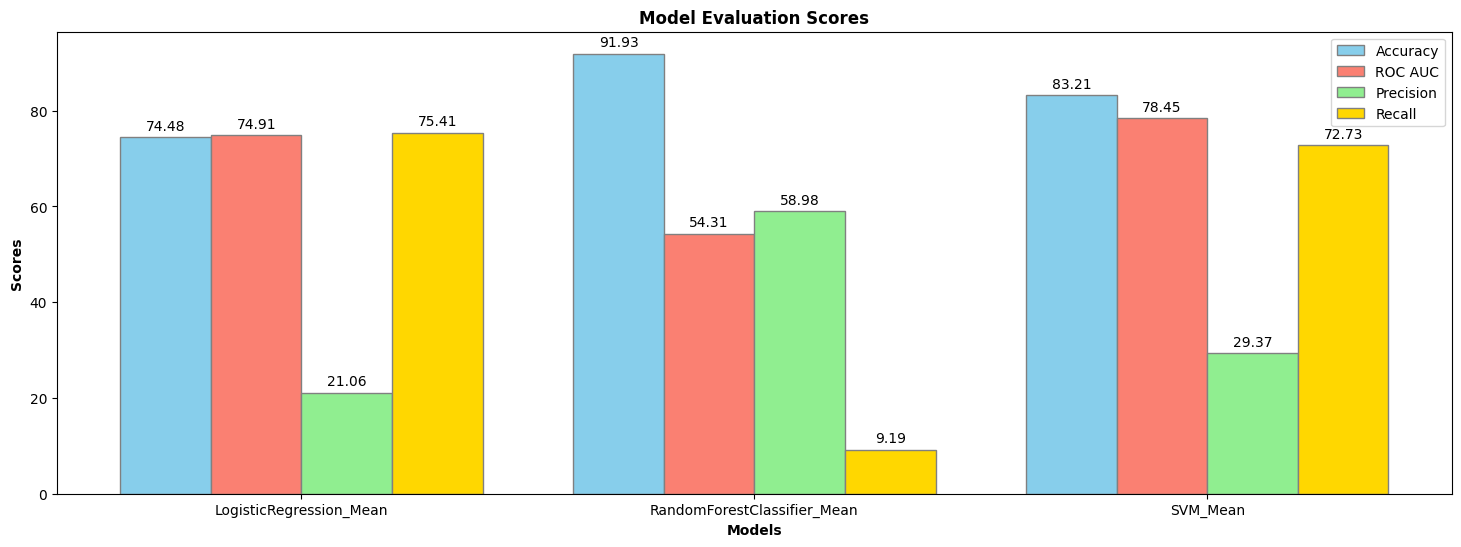

In [ ]:
# Define model names to remove
models_to_remove = ['LogisticRegression_Forward Fill', 'RandomForestClassifier_Froward Fill']

# Filter the model_score_list to remove specified model entries
model_score_list = [entry for entry in model_score_list if entry['model_name'] not in models_to_remove]

# Define the model names and corresponding evaluation metrics
model_names = [entry['model_name'] for entry in model_score_list]
acc_scores = [entry['acc_score'] for entry in model_score_list]
roc_scores = [entry['roc_score'] for entry in model_score_list]
precision_scores = [entry['precision_score'] for entry in model_score_list]
recall_scores = [entry['recall_score'] for entry in model_score_list]

# Set the width of the bars
bar_width = 0.2

# Set positions for the bars on X-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bar chart
plt.figure(figsize=(18, 6))

# Plot accuracy scores
bars1 = plt.bar(r1, acc_scores, color='skyblue', width=bar_width, edgecolor='grey', label='Accuracy')
# Plot ROC AUC scores
bars2 = plt.bar(r2, roc_scores, color='salmon', width=bar_width, edgecolor='grey', label='ROC AUC')
# Plot precision scores
bars3 = plt.bar(r3, precision_scores, color='lightgreen', width=bar_width, edgecolor='grey', label='Precision')
# Plot recall scores
bars4 = plt.bar(r4, recall_scores, color='gold', width=bar_width, edgecolor='grey', label='Recall')

# Add numerical labels at the top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width * 1.5 for r in range(len(model_names))], model_names)

# Add labels and title
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Evaluation Scores', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()
